In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from scipy.stats import zscore

df = pd.read_csv('traffic_accidents.csv')

In [ ]:
#null values
df.isnull().sum()

,0
crash_date,0
traffic_control_device,0
weather_condition,0
lighting_condition,0
first_crash_type,0
trafficway_type,0
alignment,0
roadway_surface_cond,0
road_defect,0
crash_type,0


In [ ]:
# Preprocessing dasar
df.replace(["UNKNOWN", "OTHER", "UNAVAILABLE"], np.nan, inplace=True)
df.dropna(subset=['weather_condition', 'injuries_total'], inplace=True)
df.rename(columns={'weather_condition': 'Weather', 'injuries_total': 'Total_Injuries'}, inplace=True)

# Hitung rata-rata cedera per cuaca (untuk visualisasi)
avg_injuries = df.groupby('Weather')['Total_Injuries'].mean().sort_values(ascending=False)

# Hapus outlier dari data ASLI (sebelum transformasi)
# Pilih kolom numerik (kecuali 'Total_Injuries')
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Total_Injuries', errors='ignore')

# Hapus outlier jika ada kolom numerik yang relevan
if not num_cols.empty:
    z_scores = np.abs(zscore(df[num_cols]))
    df_cleaned = df[(z_scores < 3).all(axis=1)]
else:
    df_cleaned = df.copy()

# Simpan data bersih untuk Tableau (format CSV)
df_cleaned.to_csv('cleaned_traffic_accidents.csv', index=False)



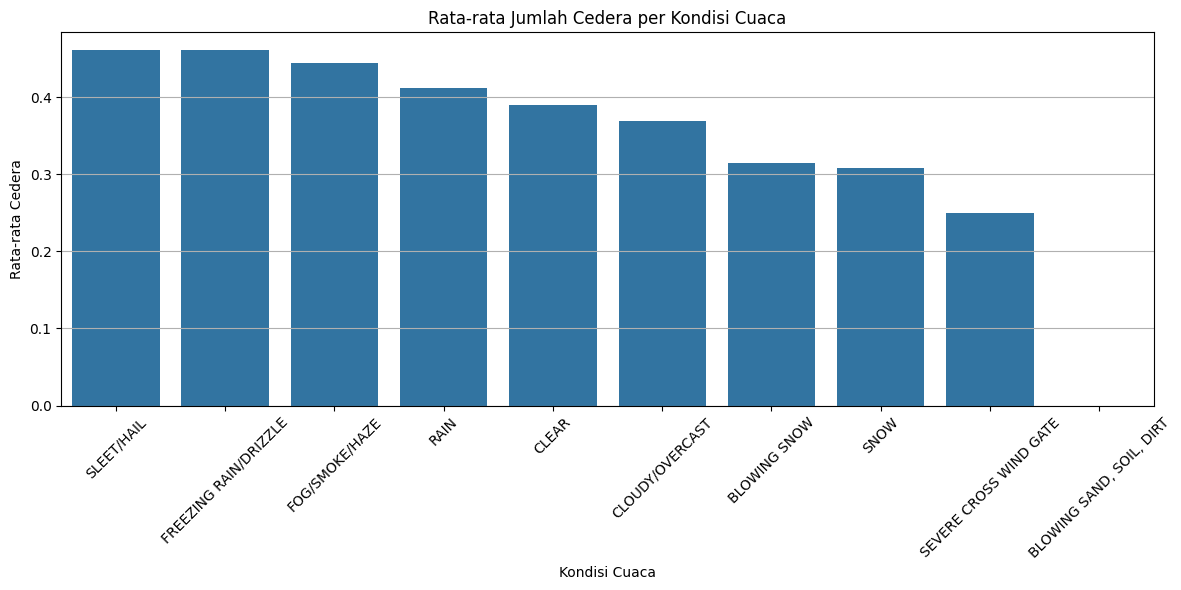

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_injuries.index, y=avg_injuries.values)
plt.xticks(rotation=45)
plt.title('Rata-rata Jumlah Cedera per Kondisi Cuaca')
plt.ylabel('Rata-rata Cedera')
plt.xlabel('Kondisi Cuaca')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Encoding data kategorikal
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# Korelasi antar fitur numerik
corr_matrix = df_encoded.corr(numeric_only=True)

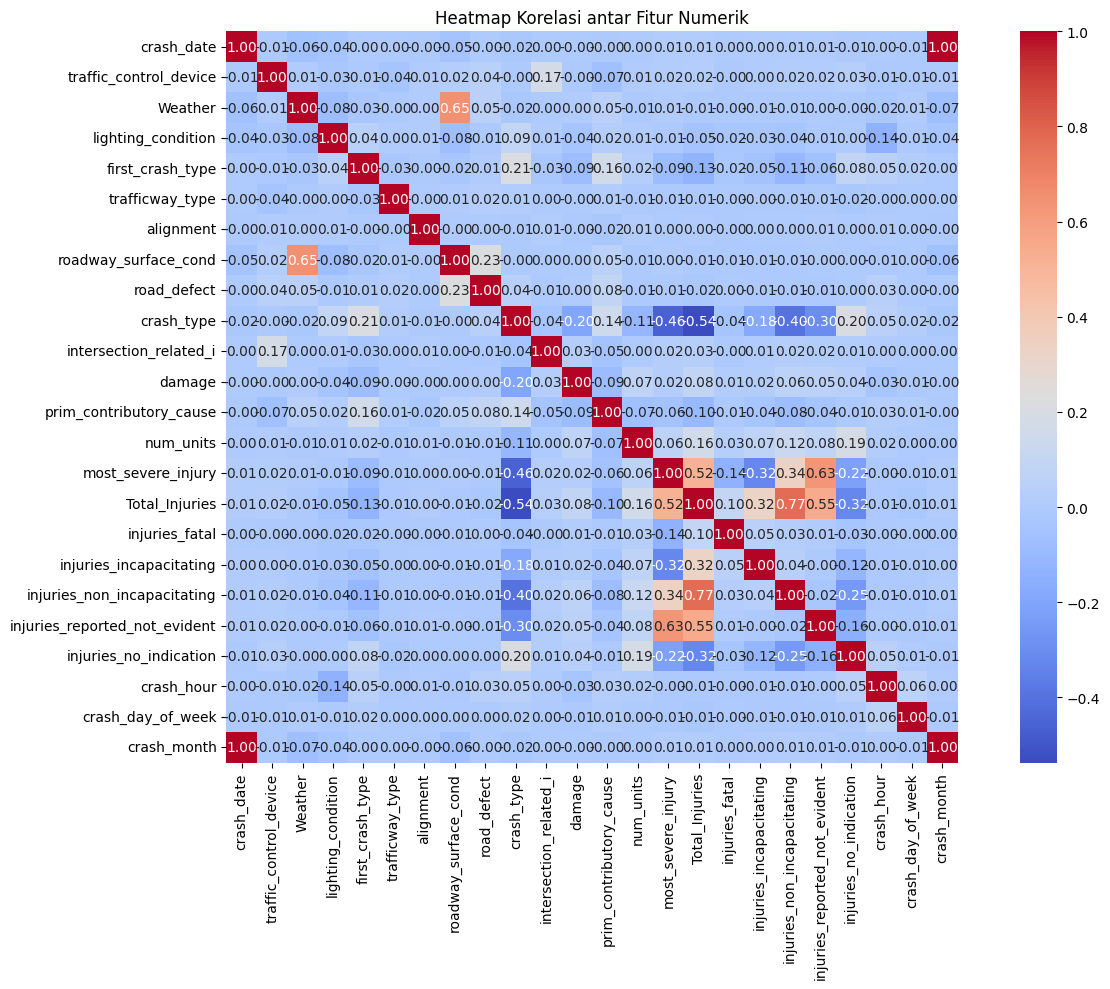

In [ ]:
# Visualisasi 2: Heatmap Korelasi
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Heatmap Korelasi antar Fitur Numerik")
plt.tight_layout()
plt.show()


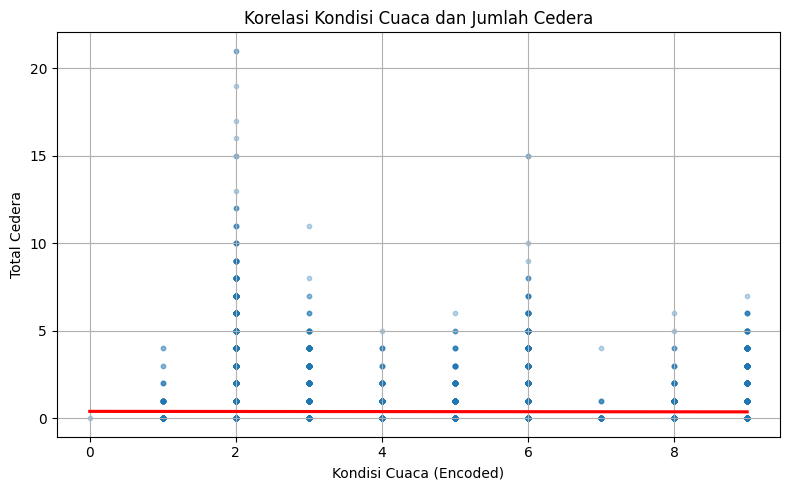

In [ ]:
# Regresi Weather (encoded) vs Total Injuries
plt.figure(figsize=(8, 5))
sns.regplot(
    x='Weather',
    y='Total_Injuries',
    data=df_encoded,
    scatter_kws={'s': 10, 'alpha': 0.3},
    line_kws={'color': 'red'}
)
plt.title('Korelasi Kondisi Cuaca dan Jumlah Cedera')
plt.xlabel('Kondisi Cuaca (Encoded)')
plt.ylabel('Total Cedera')
plt.grid(True)
plt.tight_layout()
plt.show()

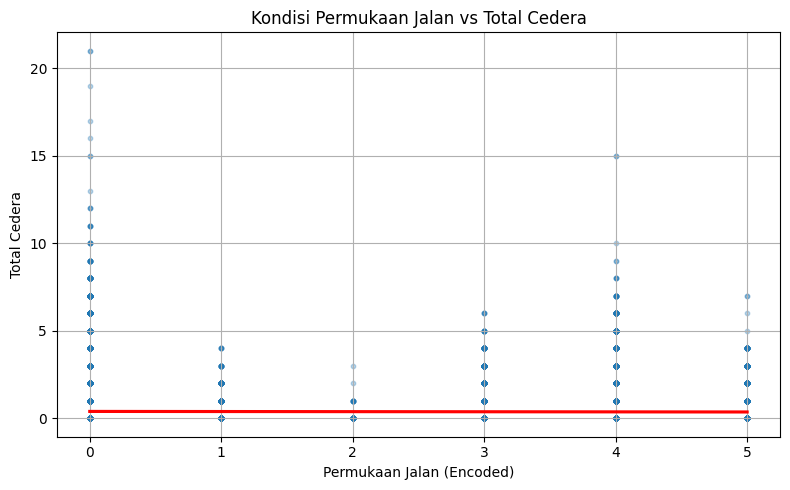

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(
    x='roadway_surface_cond',
    y='Total_Injuries',
    data=df_encoded,
    scatter_kws={'s': 10, 'alpha': 0.3},
    line_kws={'color': 'red'}
)
plt.title('Kondisi Permukaan Jalan vs Total Cedera')
plt.xlabel('Permukaan Jalan (Encoded)')
plt.ylabel('Total Cedera')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Mapping cuaca
weather_labels = {
    0: 'Clear',
    1: 'Rain',
    2: 'Snow',
    3: 'Fog',
    4: 'Severe',
    5: 'Unknown'
}
df_encoded['Weather_Label'] = df_encoded['Weather'].map(weather_labels)

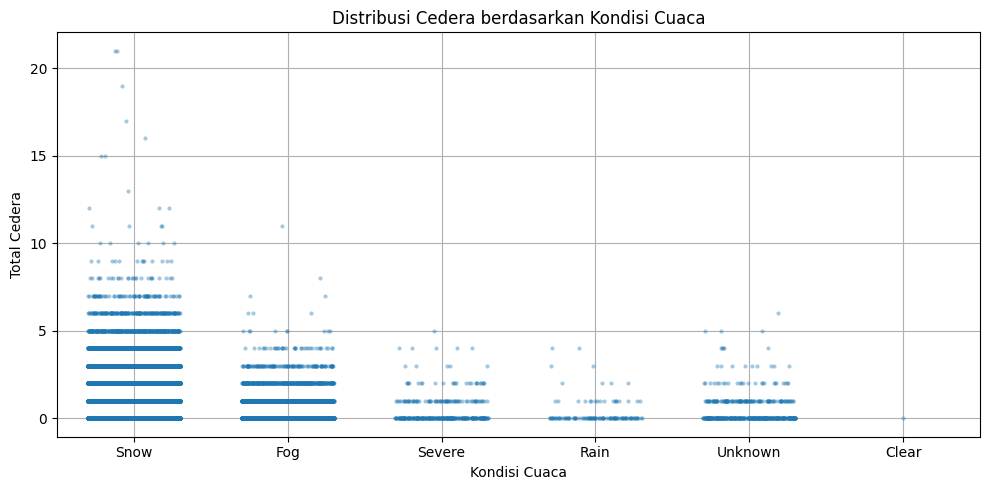

In [ ]:
# Visualisasi 5: Stripplot
plt.figure(figsize=(10, 5))
sns.stripplot(
    x='Weather_Label',
    y='Total_Injuries',
    data=df_encoded,
    size=3,
    alpha=0.4,
    jitter=0.3
)
plt.title('Distribusi Cedera berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Cedera')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-24-4015396265>:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


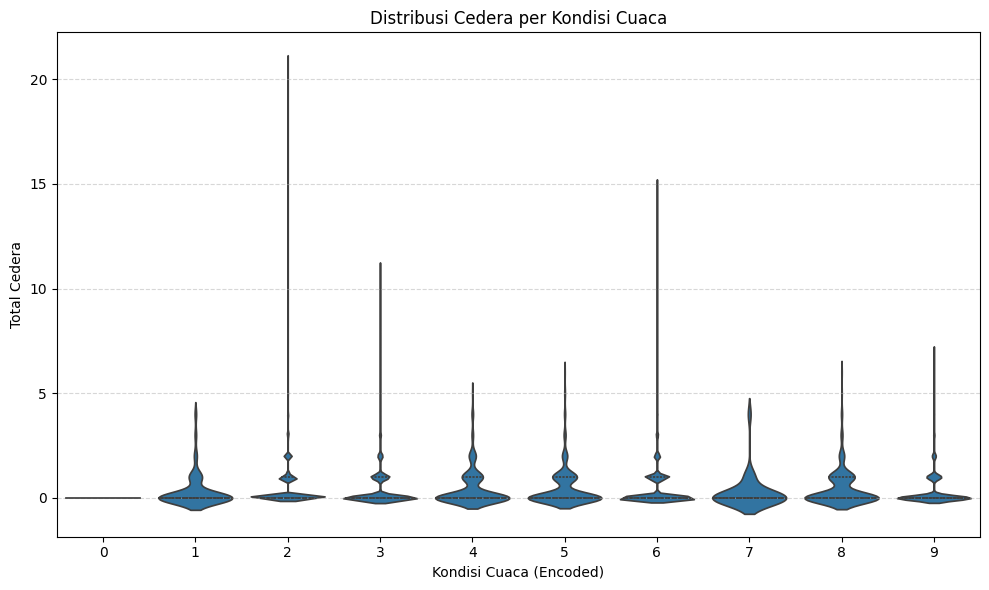

In [ ]:
# Visualisasi 6: Violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='Weather',
    y='Total_Injuries',
    data=df_encoded,
    inner='quartile',
    scale='width'
)
plt.title('Distribusi Cedera per Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca (Encoded)')
plt.ylabel('Total Cedera')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()